## **Mini Project on Cancer Data** 
Predicting Malignant (Bad) and Benign (Good) tumours. 



## **Data Extraction**

### Import necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import Cancer Dataset
Found on Kaggle - https://www.kaggle.com/datasets/erdemtaha/cancer-data

In [2]:
cancerdata = pd.read_csv('Cancer_Data.csv')
cancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Analysis of the Dataset

In [3]:
print("Data type : ", type(cancerdata))
print("Data dims : ", cancerdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (569, 33)


In [4]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Selecting a category to extract variables from:

Choosing between **‘mean’, ‘se’, and ‘worst’.**

<rb>From the cancer dataset we have found, there were 3 categories, mean, se, and worst. The values were calculated based on the cancer’s visual characteristics over a period of time.

<rb>'se' seems to be the standard deviation which is not relevant to us, and 'mean' picks the average out of the checkups they have. 
    
<rb>Our team has decided to go with the **‘worst’** as we would be taking the worst case scenario to predict whether a cancer cell is good or not.



### Extracting variables from the 'worst' category selected:

In [5]:
# Extract only the numeric data variables
# There are 3 categories: mean, se and worst. We decide to use the 'worst' categories.

numDF = pd.DataFrame(cancerdata[["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]])

# Summary Statistics for all Variables in numDF
numDF.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Exploratory Analysis of 'worse' Categorical Variables:

Analysis using Boxplot, Histplot and Violinplot:

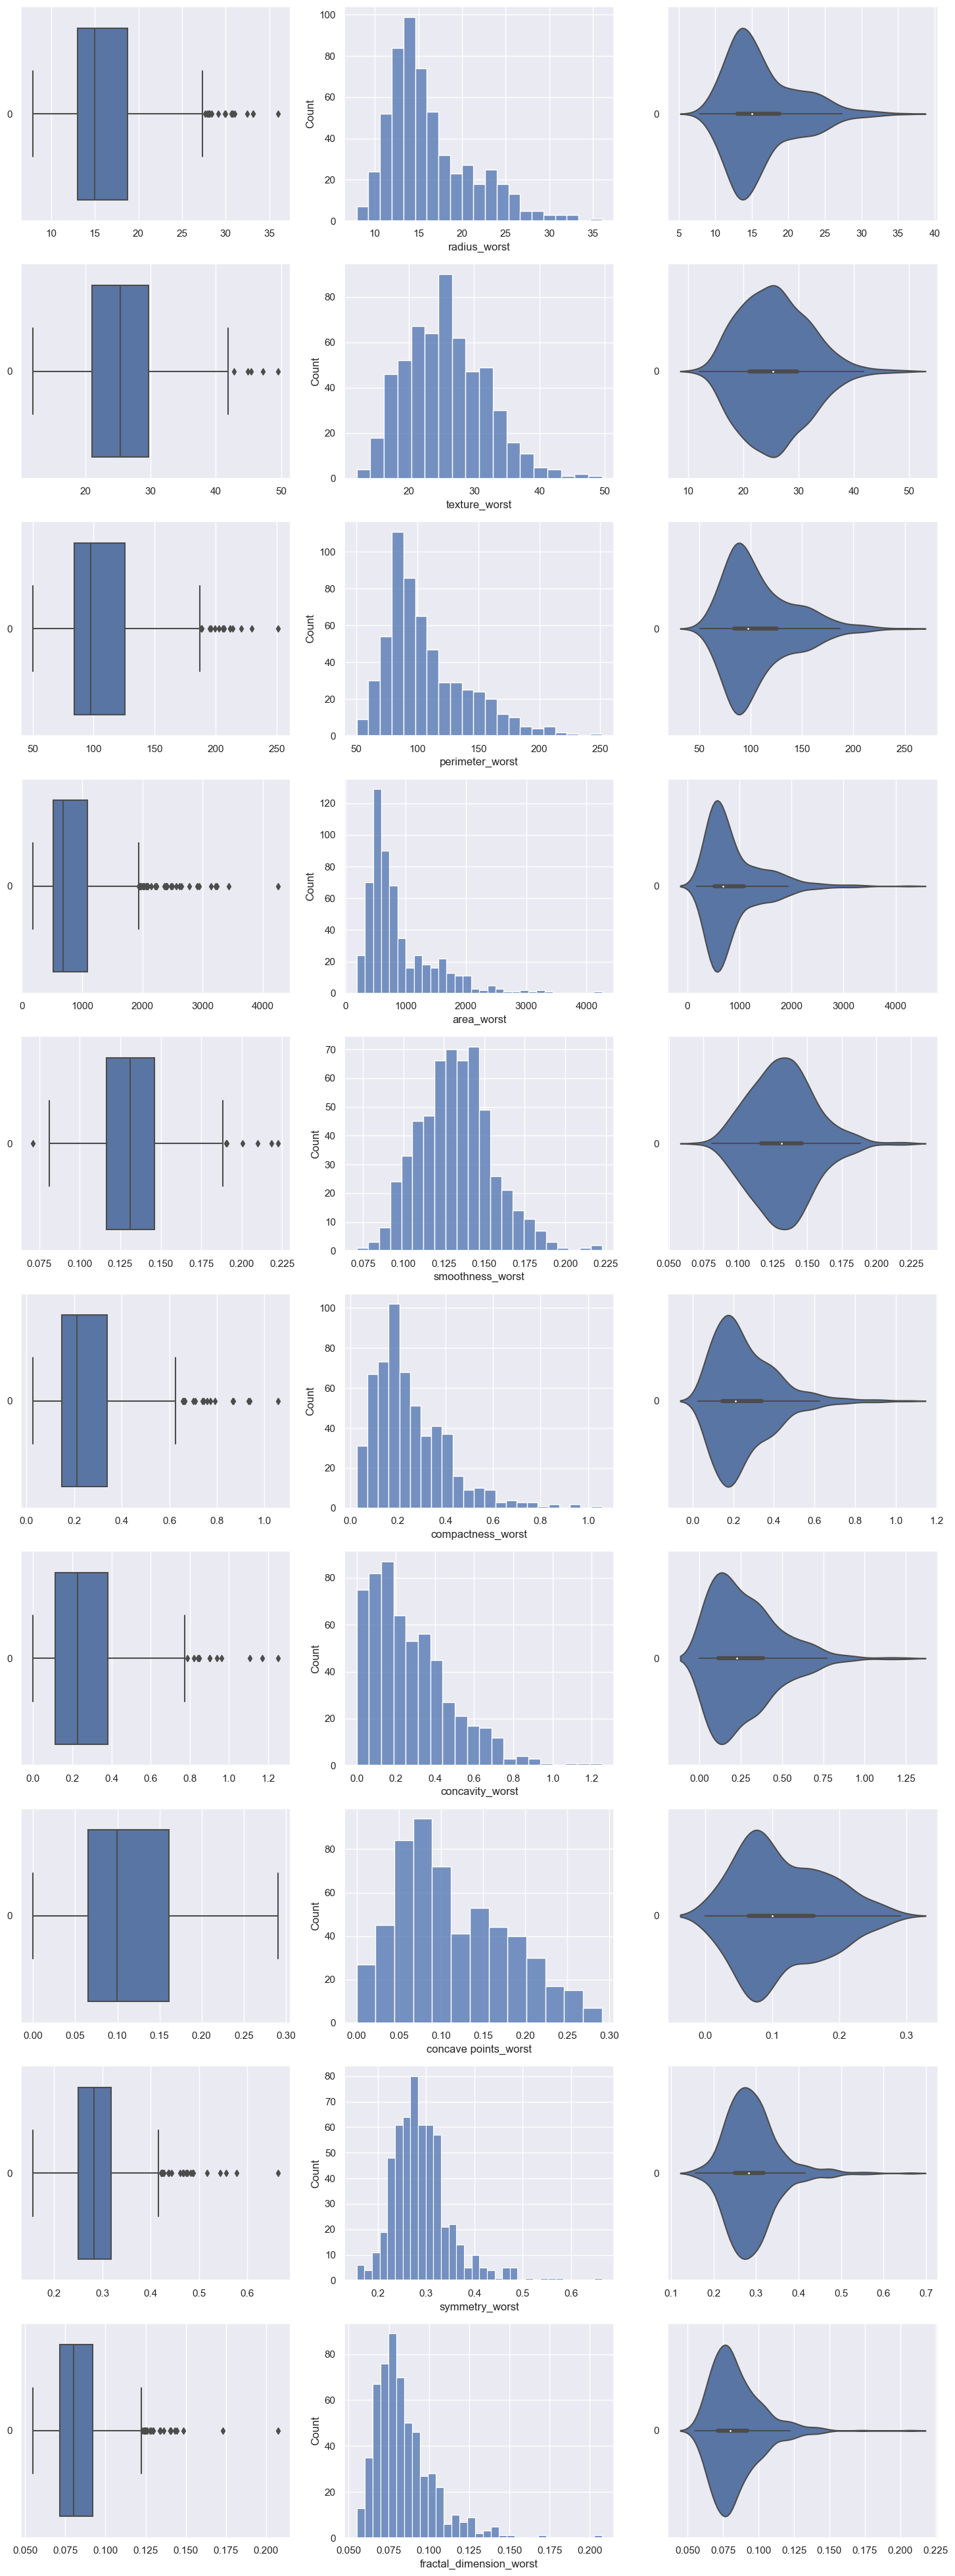

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(10, 3, figsize=(18, 50))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    
    count += 1

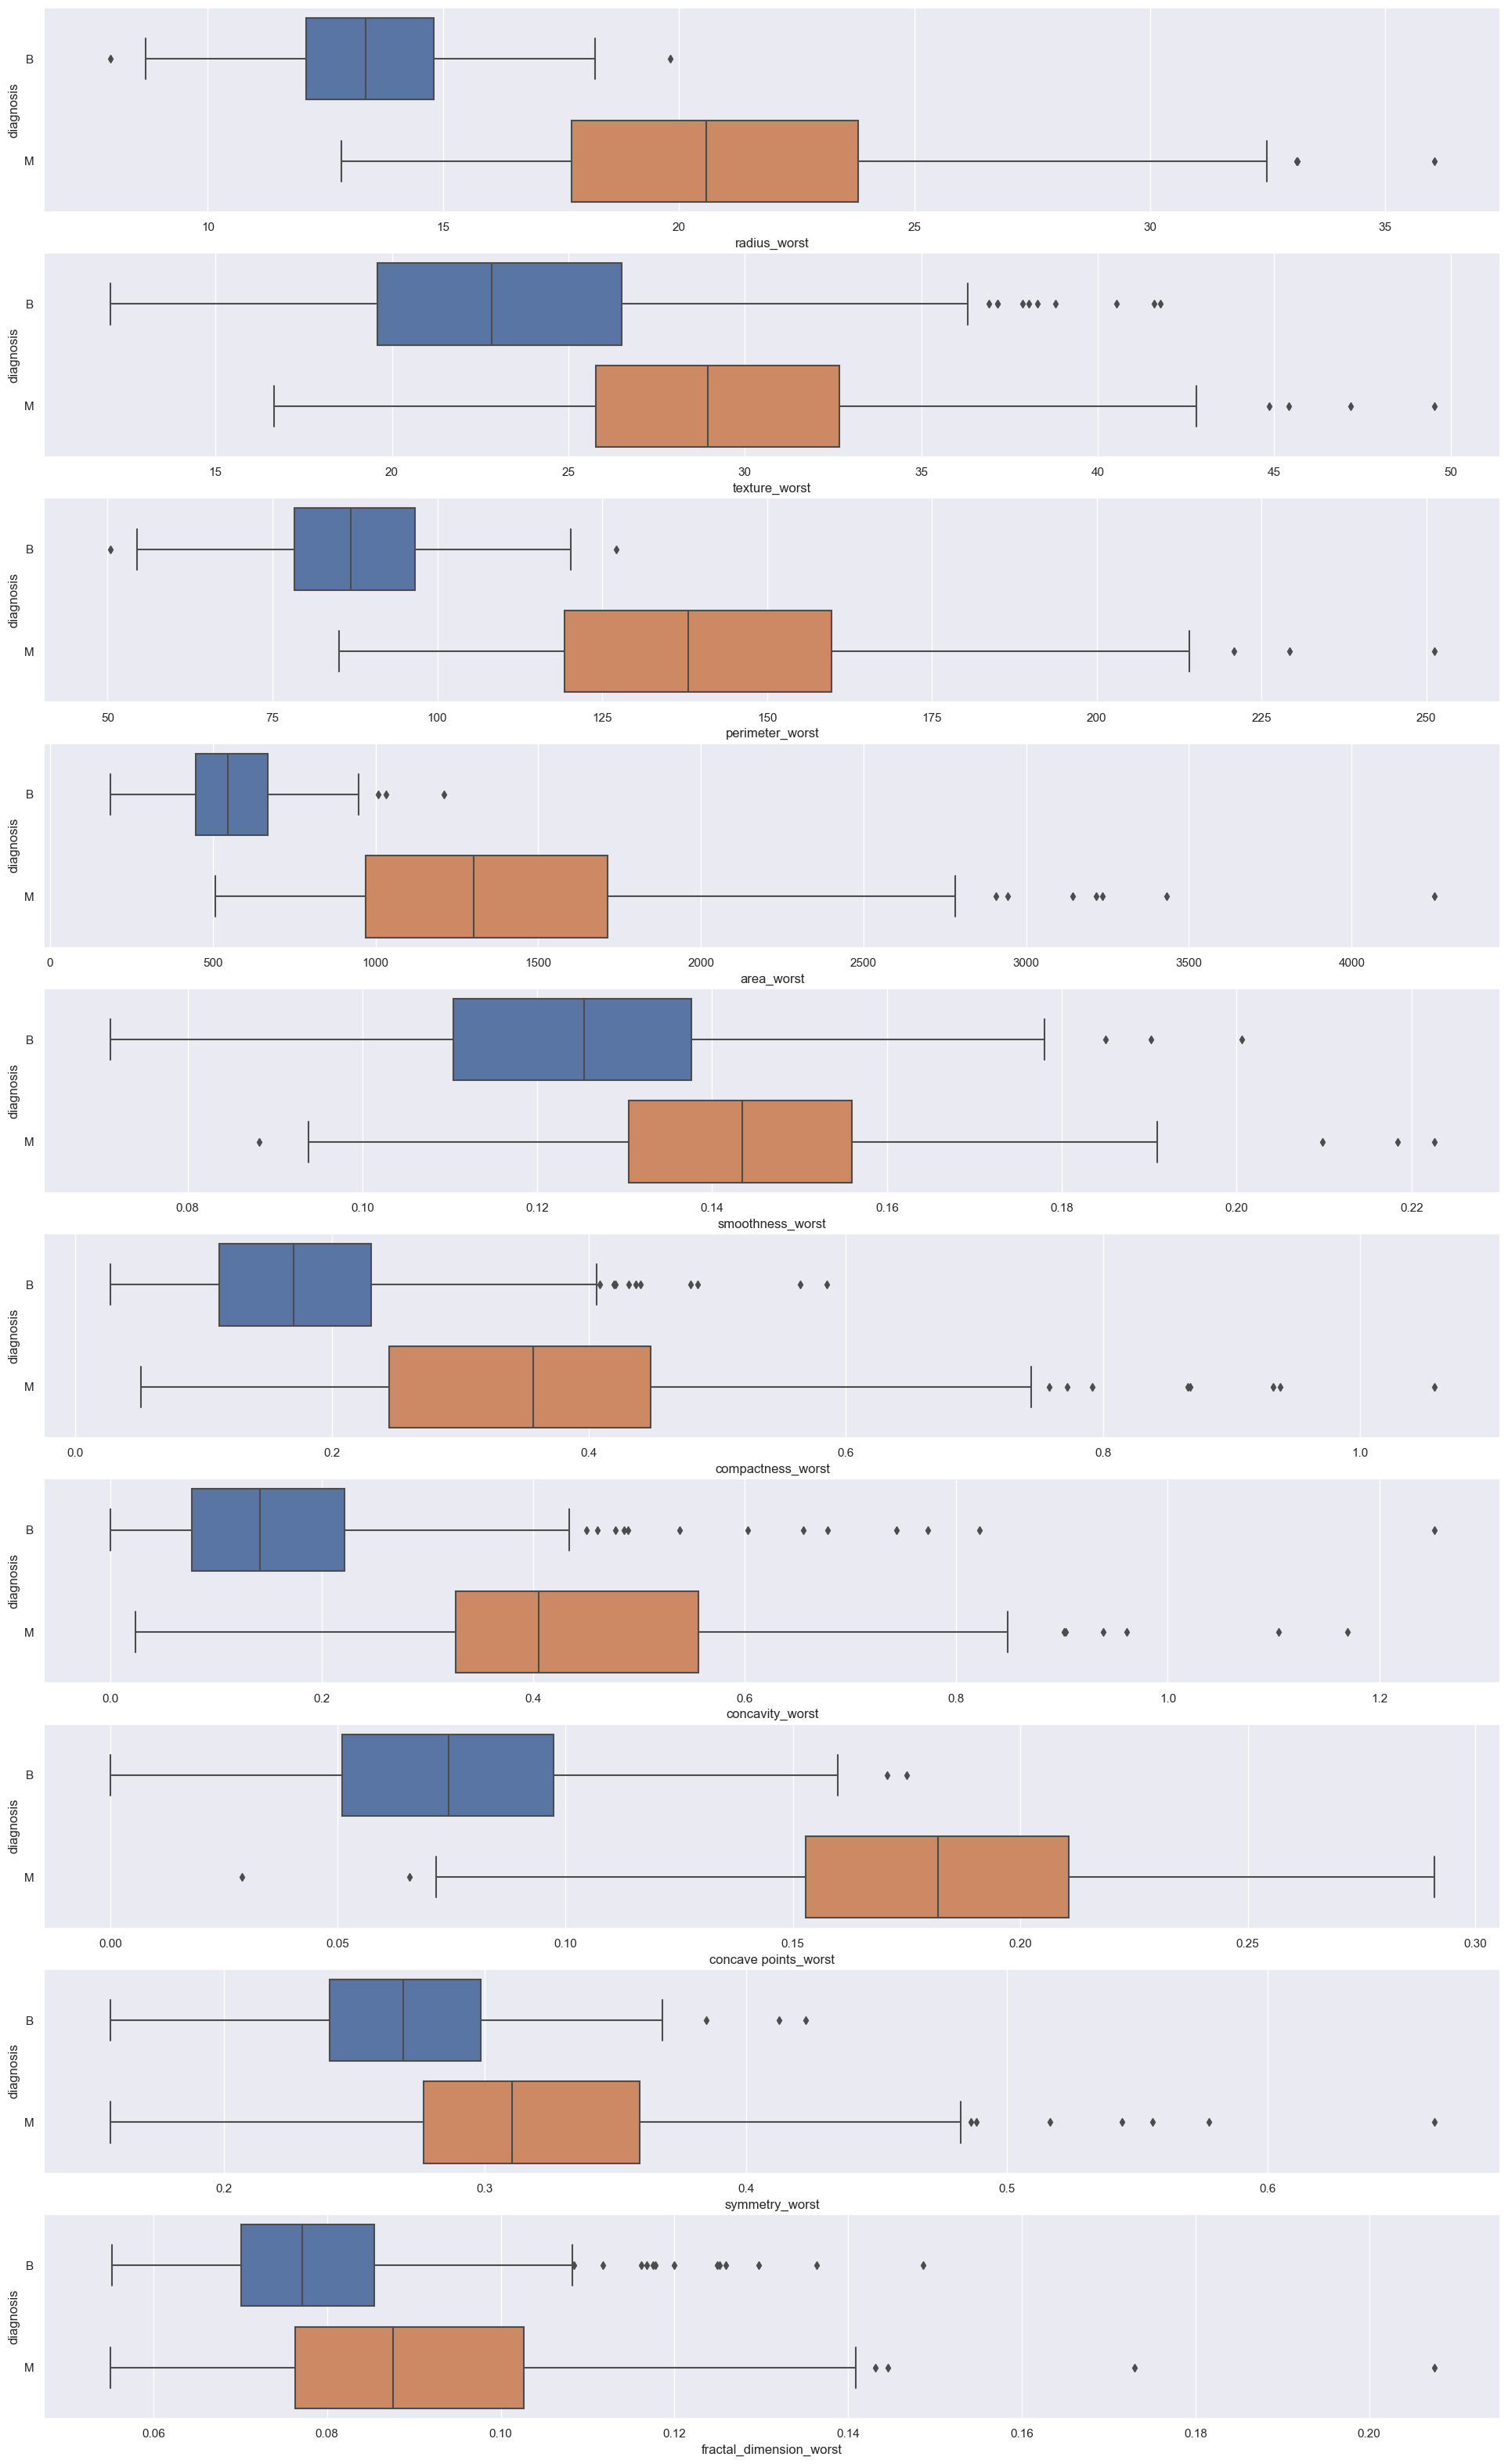

In [7]:
# # Create box-plot for each Variables
f, axes = plt.subplots(10, figsize=(24,40))

# # Define the desired order of categories
diagnosis_order = ['B', 'M']  # Assuming 'M' and 'B' are the categories in your 'diagnosis' variable

count = 0
for var in numDF:
    sb.boxplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", ax = axes[count], order=diagnosis_order)
    count += 1

### Narrowing down the variables to consider within the Subcategories

Now we will look into these variables: **area, perimeter and radius.**

Since cancer cells do not have a fixed shape, the perimeter, area, and radius are related concepts in geometry to a certain extent. The perimeter is related to area in the context of the size of the cell, as the area encapsulates information provided by the perimeter, it is redundant to keep both. 

<rb> The radius focuses from a different perspective, since cells can be in many different shapes, it is unknown how the radius was taken. Therefore, making radius irrelevant for us.
    
<rb> **Thus we choose the 'area' variables as we concluded that radius and perimeter are redundant.** 
    
<rb> We then use boxplots to compare the areas of the variables to analyse the variables further. 

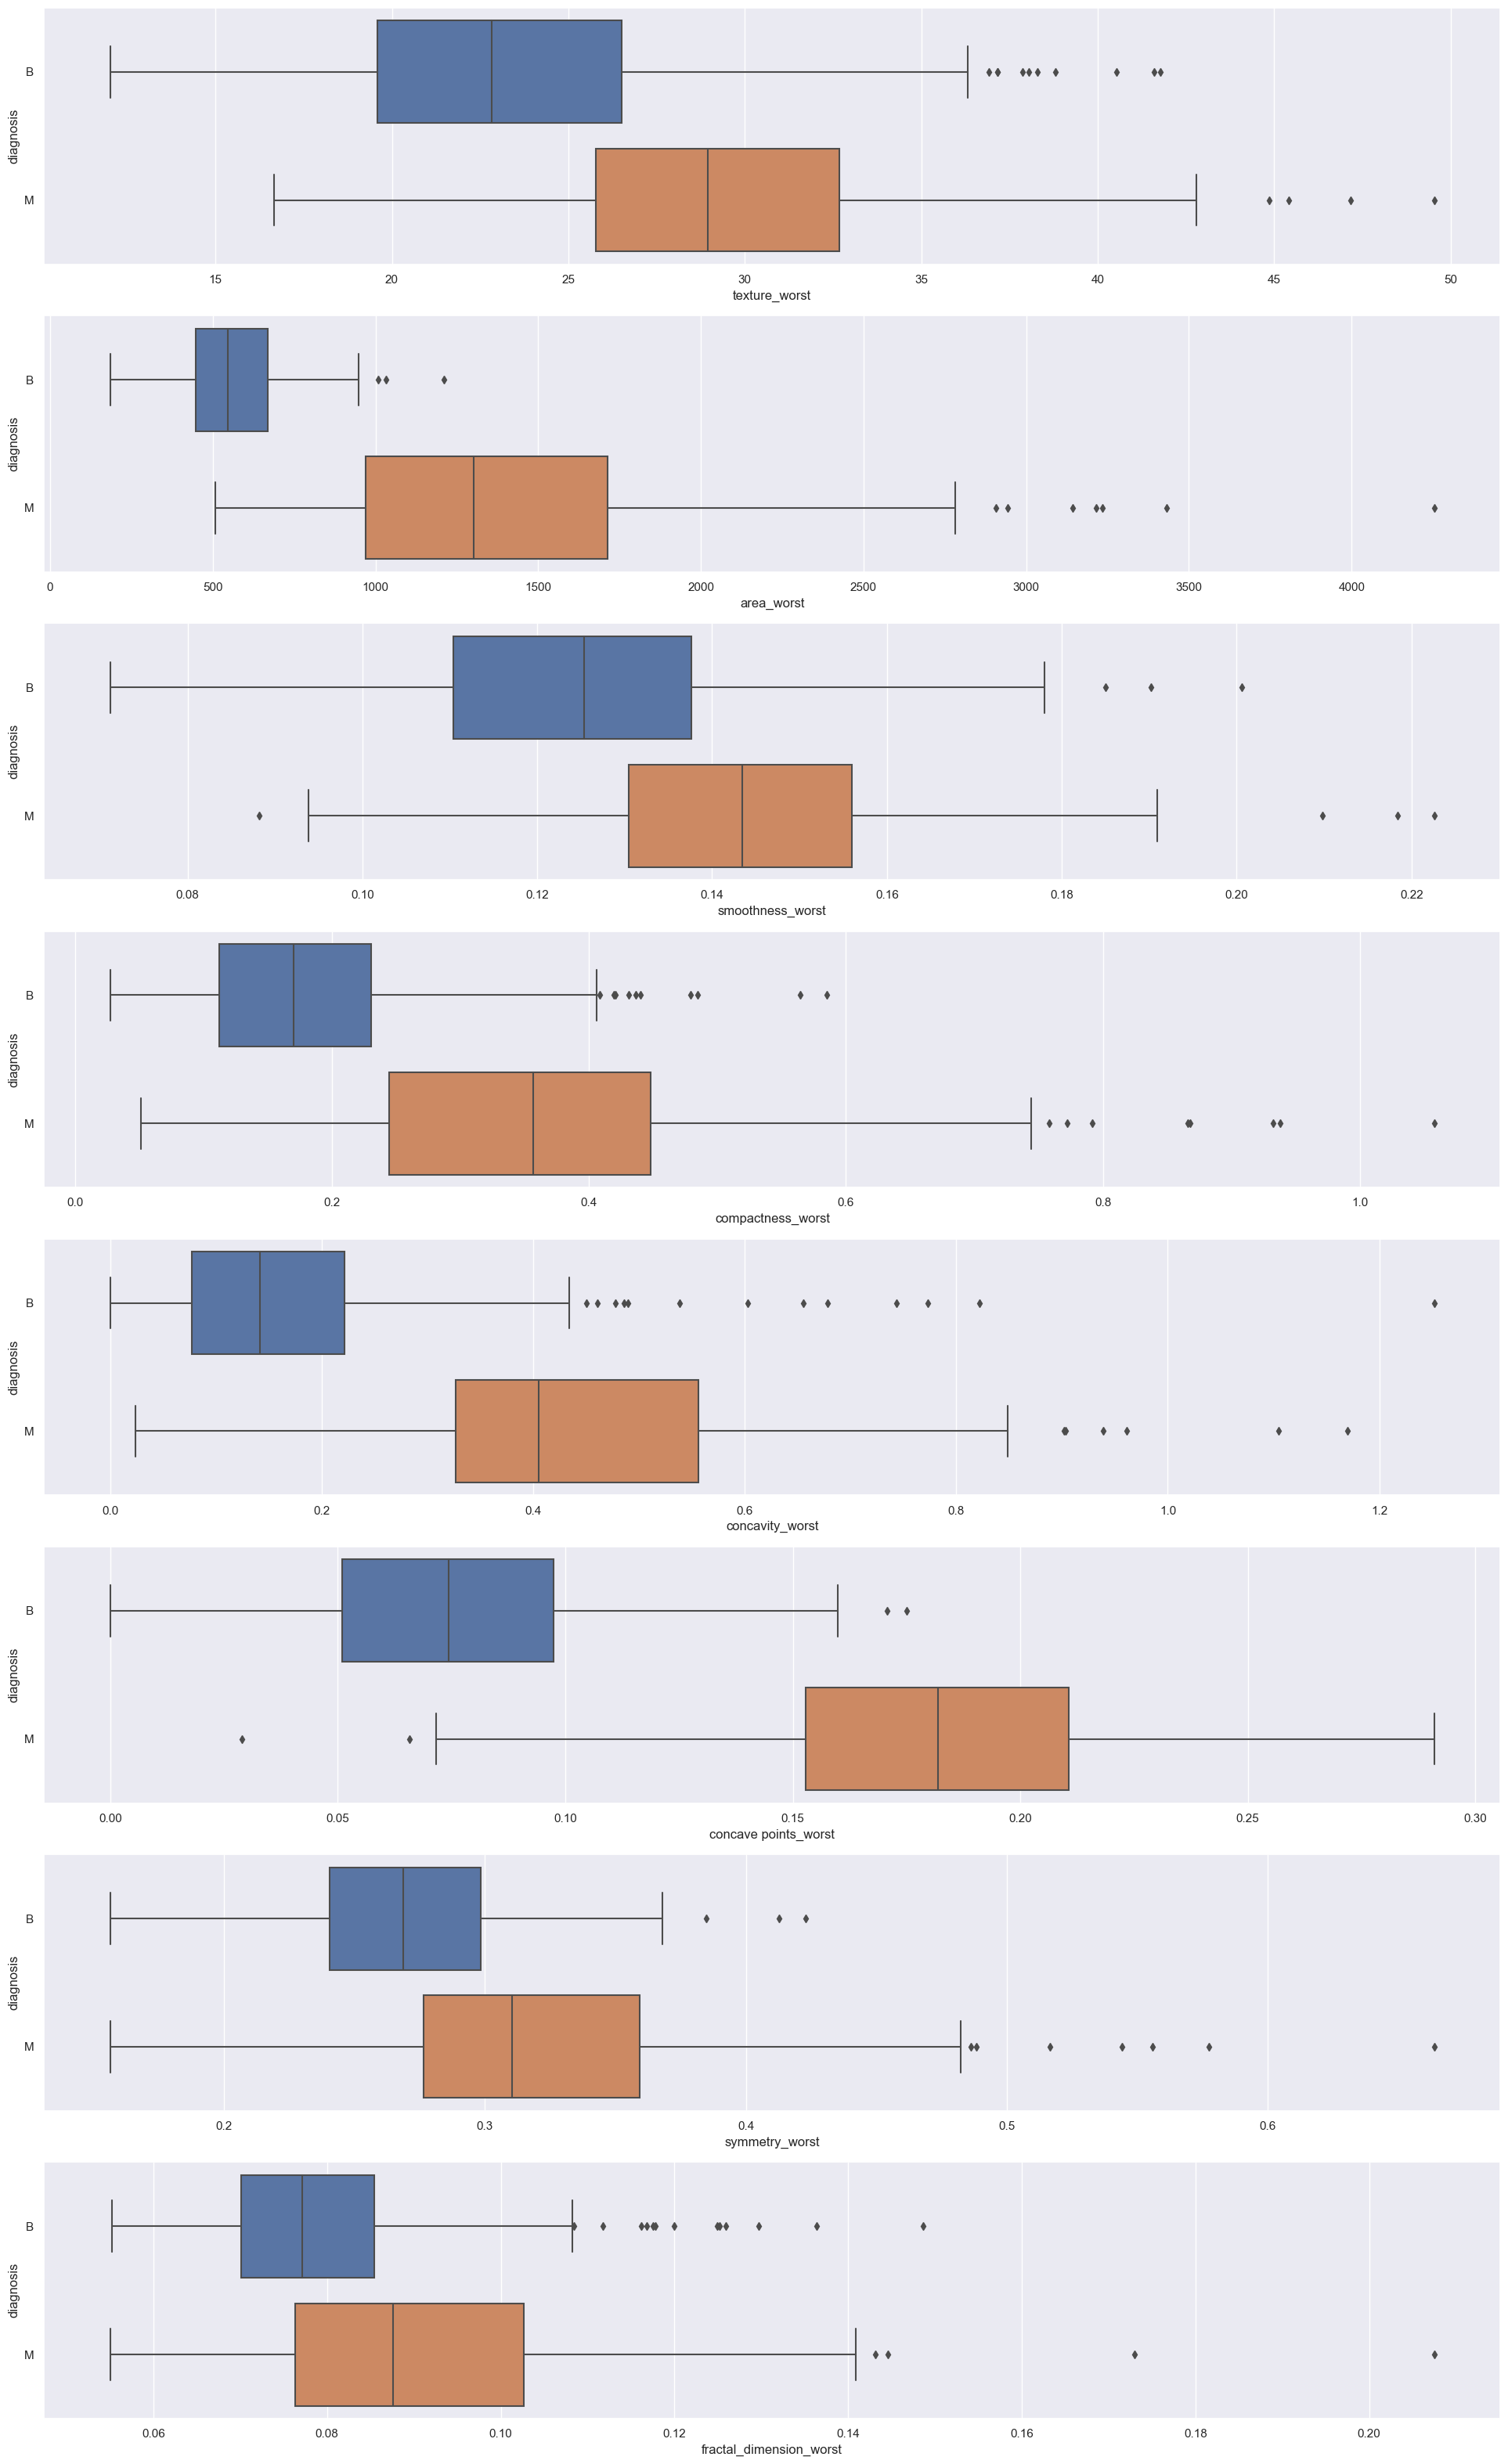

In [8]:
# Since "area_worst", "radius_worst", "perimeter_worst" are similar to each other respectively, we only pick 1 out of them.

# Drop multiple variables
variables_to_drop = ['radius_worst', 'perimeter_worst']
numDF.drop(variables_to_drop, axis=1, inplace=True)

# Create box-plot for each Variable
f, axes = plt.subplots(8, figsize=(24,40))

count = 0
for var in numDF:
    sb.boxplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", ax = axes[count], order=diagnosis_order)
    count += 1

### Evaluation of the Boxplots:

 From the diagram above, it is obvious that the top 3 variables which have the most significant effects on 'Diagnosis' is:
 **'concave points_worst' & 'area_worst' & 'concavity_worst'.**
 
<rb> Across all 3 variables there are about 50% of data points with Malignant Tumors have greater concave points, area and concavity compared to those with Benign Tumors.
This implies there are some sort of relationship between 'Diagnosis' and those 3 variables.

In [9]:
# We create a cleandata of 'Diagnosis' and those 3 variables.
cleandata = pd.DataFrame(cancerdata[["diagnosis","concavity_worst","area_worst","concave points_worst"]])
cleandata.head()

,diagnosis,concavity_worst,area_worst,concave points_worst
0,M,0.7119,2019.0,0.2654
1,M,0.2416,1956.0,0.1860
2,M,0.4504,1709.0,0.2430
3,M,0.6869,567.7,0.2575
4,M,0.4000,1575.0,0.1625
